In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()
warnings.filterwarnings('ignore')
df = pd.read_csv("combined_data.csv")

def translate(aa):
    if aa == 'ALA': return 'A'
    if aa == 'CYS': return 'C'
    if aa == 'ASP': return 'D'
    if aa == 'GLU': return 'E'
    if aa == 'PHE': return 'F'
    if aa == 'GLY': return 'G'
    if aa == 'HIS': return 'H'
    if aa == 'ILE': return 'I'
    if aa == 'LYS': return 'K'
    if aa == 'LEU': return 'L'
    if aa == 'MET': return 'M'
    if aa == 'ASN': return 'N'
    if aa == 'PRO': return 'P'
    if aa == 'GLN': return 'Q'
    if aa == 'ARG': return 'R'
    if aa == 'SER': return 'S'
    if aa == 'THR': return 'T'
    if aa == 'VAL': return 'V'
    if aa == 'TRP': return 'W'
    if aa == 'TYR': return 'Y'

def convert(n):
    return -n

Text(0.5, 1.0, 'NanobodyG949F')

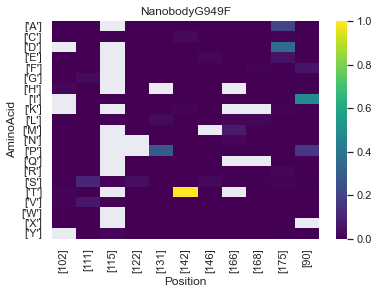

In [3]:
ap2 = df[['AA','Unsorted_Percent','AP2_Percent']]
ap2['Enrichment'] = (ap2['AP2_Percent'] / ap2['Unsorted_Percent'])*100
ap2[['Position','AminoAcid']] = ap2.AA.str.split(":",expand=True)
ap2 = ap2.drop(columns=['AA','Unsorted_Percent','AP2_Percent'])
ap2['Enrichment'] = MinMaxScaler().fit_transform(np.array(ap2['Enrichment']).reshape(-1,1))
ap2 = ap2.pivot("AminoAcid", "Position", "Enrichment")
ax2 = sns.heatmap(ap2, vmin=0.0, vmax=1.0, cmap='viridis', xticklabels=1, yticklabels=1)
ax2.set_title('NanobodyG949F')

Text(0.5, 1.0, 'NanobodyG914A')

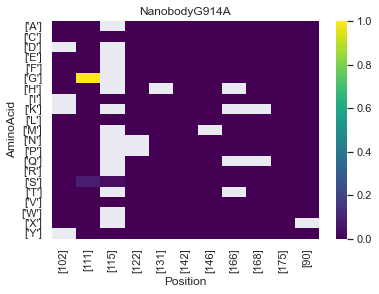

In [4]:
ap1 = df[['AA','Unsorted_Percent','AP1_Percent']]
ap1['Enrichment'] = (ap1['AP1_Percent'] / ap1['Unsorted_Percent'])*100
ap1[['Position','AminoAcid']] = ap1.AA.str.split(":",expand=True)
ap1 = ap1.drop(columns=['AA','Unsorted_Percent','AP1_Percent'])
ap1['Enrichment'] = MinMaxScaler().fit_transform(np.array(ap1['Enrichment']).reshape(-1,1))
ap1 = ap1.pivot("AminoAcid", "Position", "Enrichment")
ax1 = sns.heatmap(ap1, vmin=0.0, vmax=1.0, cmap='viridis', xticklabels=1, yticklabels=1)
ax1.set_title('NanobodyG914A')

Text(0.5, 1.0, 'NanobodyG950A')

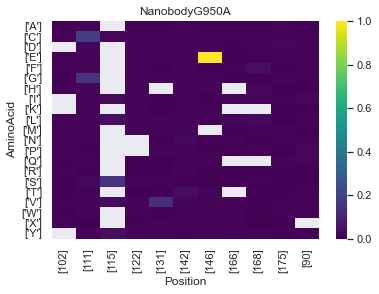

In [5]:
ap3 = df[['AA','Unsorted_Percent','AP3_Percent']]
ap3['Enrichment'] = (ap3['AP3_Percent'] / ap3['Unsorted_Percent'])*100
ap3[['Position','AminoAcid']] = ap3.AA.str.split(":",expand=True)
ap3 = ap3.drop(columns=['AA','Unsorted_Percent','AP3_Percent'])
ap3['Enrichment'] = MinMaxScaler().fit_transform(np.array(ap3['Enrichment']).reshape(-1,1))
ap3 = ap3.pivot("AminoAcid", "Position", "Enrichment")
ax3 = sns.heatmap(ap3, vmin=0.0, vmax=1.0, cmap='viridis', xticklabels=1, yticklabels=1)
ax3.set_title('NanobodyG950A')

Text(0.5, 1.0, 'NanobodyG914A')

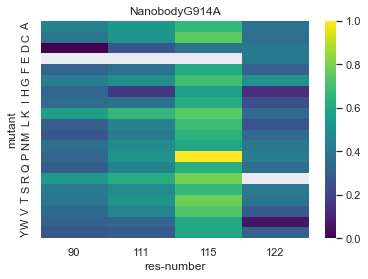

In [6]:
df_6lr7 = pd.read_csv("6lr7_webdata.csv")
df_6lr7['mutant'] = df_6lr7['mutant'].apply(translate)
df_6lr7['mcsm-ppi2-prediction'] = df_6lr7['mcsm-ppi2-prediction'].apply(convert)
df_6lr7 = df_6lr7.drop(columns=['chain','wild-type','distance-to-interface','affinity'])
df_6lr7['mcsm-ppi2-prediction'] = MinMaxScaler().fit_transform(np.array(df_6lr7['mcsm-ppi2-prediction']).reshape(-1,1))
df_6lr7 = df_6lr7.pivot("mutant", "res-number", "mcsm-ppi2-prediction")
ax_6lr7 = sns.heatmap(df_6lr7, vmin=0, vmax=1, cmap='viridis', 
                      xticklabels=1, yticklabels=1)
ax_6lr7.set_title('NanobodyG914A')

Text(0.5, 1.0, 'NanobodyG950F')

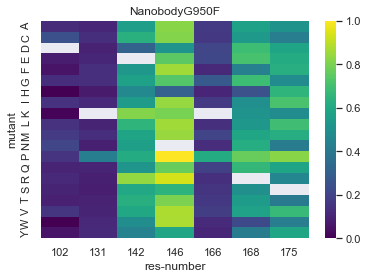

In [7]:
df_3k1k = pd.read_csv("3k1k_webdata.csv")
df_3k1k['mutant'] = df_3k1k['mutant'].apply(translate)
df_3k1k['mcsm-ppi2-prediction'] = df_3k1k['mcsm-ppi2-prediction'].apply(convert)
df_3k1k = df_3k1k.drop(columns=['chain','wild-type','distance-to-interface','affinity'])
df_3k1k['mcsm-ppi2-prediction'] = MinMaxScaler().fit_transform(np.array(df_3k1k['mcsm-ppi2-prediction']).reshape(-1,1))
df_3k1k = df_3k1k.pivot("mutant", "res-number", "mcsm-ppi2-prediction")
ax_3k1k = sns.heatmap(df_3k1k, vmin=0, vmax=1, cmap='viridis', 
                      xticklabels=1, yticklabels=1)
ax_3k1k.set_title('NanobodyG950F')

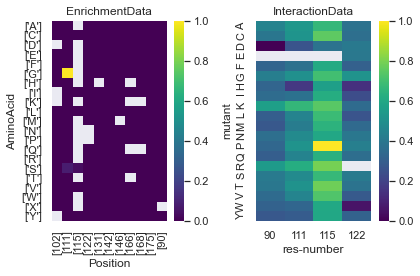

In [8]:
fig1, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(ap1, vmin=0.0, vmax=1.0, cmap='viridis', xticklabels=1, yticklabels=1, ax=ax1)
ax1.set_title('EnrichmentData')
sns.heatmap(df_6lr7, vmin=0, vmax=1, cmap='viridis', xticklabels=1, yticklabels=1, ax=ax2)
ax2.set_title('InteractionData')
fig1.tight_layout()

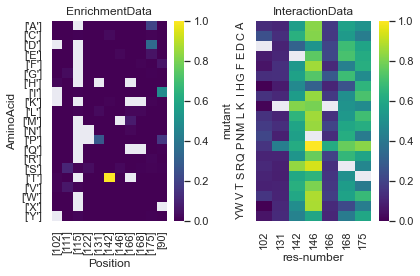

In [9]:
fig2, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(ap2, vmin=0.0, vmax=1.0, cmap='viridis', xticklabels=1, yticklabels=1, ax=ax1)
ax1.set_title('EnrichmentData')
sns.heatmap(df_3k1k, vmin=0, vmax=1, cmap='viridis', xticklabels=1, yticklabels=1, ax=ax2)
ax2.set_title('InteractionData')
fig2.tight_layout()

In [9]:
#fig1.savefig('ap1.png')
#fig2.savefig('ap2.png')
#ax3.get_figure().savefig('ap3.png')

In [10]:
df_6lr7

res-number,90,111,115,122
mutant,,,,
A,0.445499,0.529054,0.664261,0.378656
C,0.392708,0.518420,0.750095,0.362704
D,0.000000,0.260919,0.379035,0.405621
E,NaN,NaN,NaN,0.401063
F,0.316749,0.371060,0.608052,0.306874
G,0.424991,0.496392,0.698063,0.513863
H,0.320547,0.163692,0.561337,0.137486
I,0.349791,0.372579,0.620585,0.230915
K,0.560957,0.662742,0.740220,0.346373
